# MDI341: TP Graphs

In [1]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import os.path
from urllib.request import urlretrieve
import tarfile
import scipy.stats
from multiprocessing import Manager, Pool
from itertools import product
from collections import defaultdict

import warnings
warnings.simplefilter('ignore')

**Note** : la documentation de NetworkX se trouve [ici](http://networkx.readthedocs.io/)

## Analyse de graphes

### Erdős-Rényi

#### Question 1

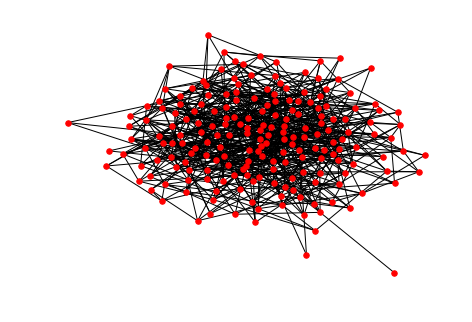

In [2]:
n = 200
p = 0.04
G_erdos = nx.erdos_renyi_graph(n, p, seed=12)
nx.draw(G_erdos, node_size=30)

#### Question 2

In [3]:
nodes = G_erdos.nodes()
edges = G_erdos.edges()
degrees = list(G_erdos.degree().values())

print('Nombre de noeuds:', len(nodes))
print('Nombre d\'arêtes :', len(edges))
print('Degré minimum   :', np.min(degrees))
print('Degré maximum   :', np.max(degrees))
print('Degré médian    :', np.median(degrees))
print('Degré moyen     :', np.mean(degrees))

Nombre de noeuds: 200
Nombre d'arêtes : 784
Degré minimum   : 1
Degré maximum   : 19
Degré médian    : 7.0
Degré moyen     : 7.84


Espérance du degré moyen: $n \times p = 200 \times 0.04 = 8$.$$$$
On trouve 7.84, soit une valeur approchée à $100\times\frac{(8-7.84)}{8} = 2$% près. L'imprécision est sans doute dûe au petit nombre de noeuds.

#### Question 3

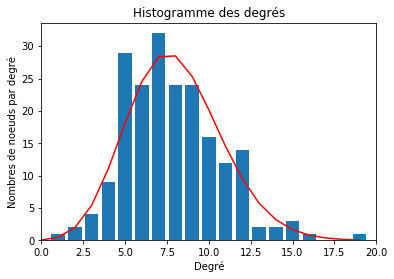

In [4]:
histo = nx.degree_histogram(G_erdos)
plt.xlabel('Degré')
plt.ylabel('Nombres de noeuds par degré')
plt.title('Histogramme des degrés')
n_bins = len(histo)
bins = list(range(n_bins))
plt.bar(bins, histo, width=0.8)
pmf = scipy.stats.binom.pmf(bins, n, p) * n
plt.plot(bins, pmf, c='r')
plt.xlim(0, n_bins)
pass

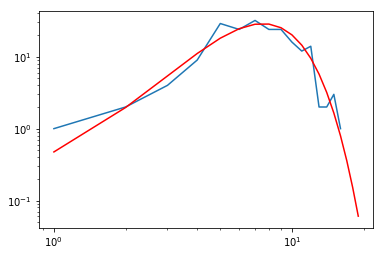

In [5]:
plt.loglog(bins, histo)
plt.loglog(bins, pmf, c='r')
pass

Malgré une certaine imprécision, les courbes sont relativement conformes à ce que l'on attend.

#### Question 4

In [6]:
avg_clustering = nx.average_clustering(G_erdos)
print('Coefficient de clustering:', avg_clustering)

Coefficient de clustering: 0.036478815774868376


On trouve 0.03648, soit une valeur approchée à $100\times\frac{(0.04-0.03648)}{8} = 0.35$% près.

#### Question 5

Average length of shortest paths: 2.7879396984924623
Diameter of the graph (longest shortest path): 5


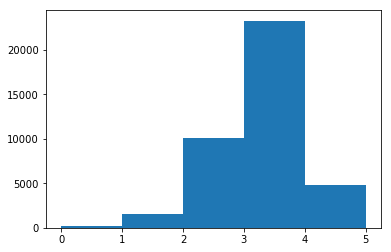

In [7]:
flattened = []
for r in nx.shortest_path_length(G_erdos).values():
    flattened.extend(r.values())

mean_shortest_path_length = nx.average_shortest_path_length(G_erdos)
max_shortest_path_length = nx.diameter(G_erdos)

print('Average length of shortest paths:',
     mean_shortest_path_length)
# print('Average length of shortest paths2:',
#      np.mean(flattened))
print('Diameter of the graph (longest shortest path):',
     max_shortest_path_length)
plt.hist(flattened, bins=range(max_shortest_path_length+1))
pass

### Qu'en déduire?
On a:
  - un coefficient de clustering faible
  - un plus court chemin moyen relativement bas
  - un diamètre du graphe petit
  - une distribution des plus courts chemins proche d'une gaussienne

Je ne pense pas que nous soyons témoins d'effet de "petit monde" pour ce graphe.

#### Question 6

### Barabási–Albert

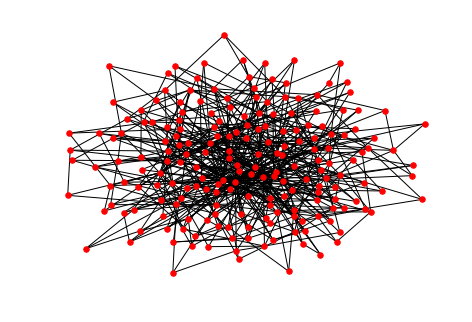

In [8]:
n = 200
m = 3
G_barabasi = nx.barabasi_albert_graph(n=n, m=m)
nx.draw(G_barabasi, node_size=30)

In [9]:
nodes = G_barabasi.nodes()
edges = G_barabasi.edges()
degrees = list(G_barabasi.degree().values())

print('Nombre de noeuds:', len(nodes))
print('Nombre d\'arêtes :', len(edges))
print('Degré minimum   :', np.min(degrees))
print('Degré maximum   :', np.max(degrees))
print('Degré médian    :', np.median(degrees))
print('Degré moyen     :', np.mean(degrees))

Nombre de noeuds: 200
Nombre d'arêtes : 591
Degré minimum   : 2
Degré maximum   : 42
Degré médian    : 4.0
Degré moyen     : 5.91


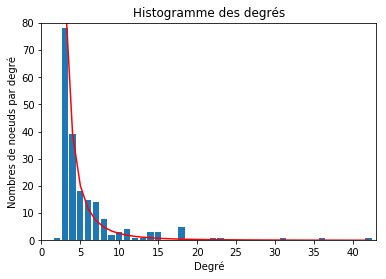

In [10]:
histo = nx.degree_histogram(G_barabasi)
plt.xlabel('Degré')
plt.ylabel('Nombres de noeuds par degré')
plt.title('Histogramme des degrés')
n_bins = len(histo)
bins = list(range(n_bins))
plt.bar(bins, histo, width=0.8)
plt.plot(bins[1:], list(map(lambda x: 2500*pow(x, -3), bins[1:])), c='r')
plt.xlim(0, n_bins)
plt.ylim(0, 80)
pass

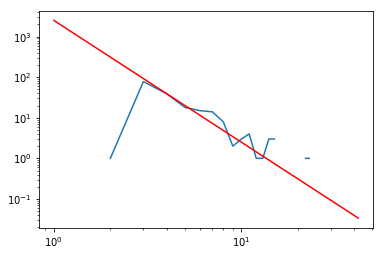

In [11]:
plt.loglog(bins, histo)
plt.plot(bins[1:], list(map(lambda x: 2500*pow(x, -3), bins[1:])), c='r')
pass

In [12]:
avg_clustering = nx.average_clustering(G_barabasi)
print('Coefficient de clustering:', avg_clustering)

Coefficient de clustering: 0.09161548097187962


Average length of shortest paths: 2.8991959798994973
Diameter of the graph (longest shortest path): 5


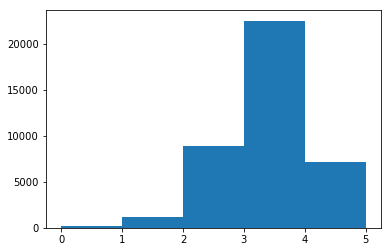

In [13]:
flattened = []
for r in nx.shortest_path_length(G_barabasi).values():
    flattened.extend(r.values())

mean_shortest_path_length = nx.average_shortest_path_length(G_barabasi)
max_shortest_path_length = nx.diameter(G_barabasi)

print('Average length of shortest paths:',
     mean_shortest_path_length)
# print('Average length of shortest paths2:',
#      np.mean(flattened))
print('Diameter of the graph (longest shortest path):',
     max_shortest_path_length)
plt.hist(flattened, bins=range(max_shortest_path_length+1))
pass

## Graphe Karate Club

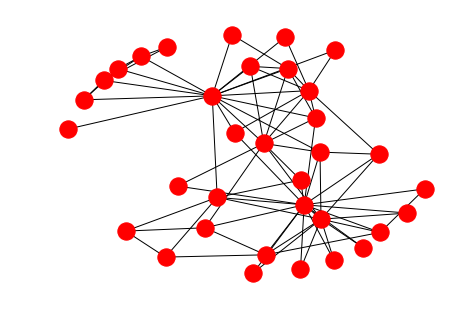

In [14]:
n=34
G_karate = nx.karate_club_graph()

# on définit une position des noeuds qui peut être ré-utilisée plusieurs fois
# en appelant la fonction nx.draw avec l'option pos=pos
pos = nx.spring_layout(G_karate)
nx.draw(G_karate, cmap=plt.get_cmap('rainbow'), pos=pos)

#### Question 7

In [15]:
# le code suivant calcule une matrice de taille n x n
# distances[i, j] contient la longueur du plus court chemin entre les noeuds i et j
pcc_longueurs=nx.all_pairs_shortest_path_length(G_karate)
distances=np.zeros((n,n))

for i in range(n):
    for j in range(n):
        distances[i, j] = pcc_longueurs[i][j]

With linkage "complete" and 2 clusters:


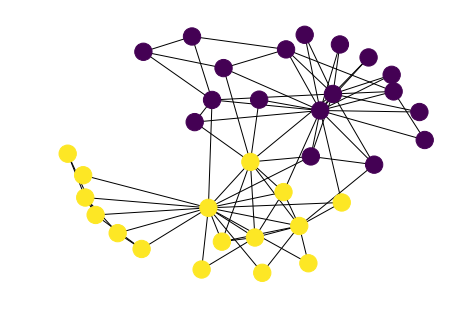

In [16]:
cl = AgglomerativeClustering(2, affinity='precomputed', linkage='complete')
print('With linkage "{}" and {} clusters:'.format('complete', 2))
nx.draw(G_karate, node_color=cl.fit_predict(distances))

With linkage "complete" and 4 clusters:


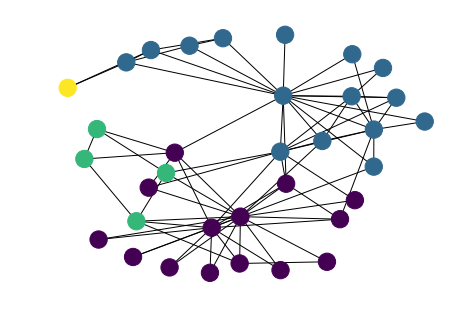

In [17]:
cl = AgglomerativeClustering(4, affinity='precomputed', linkage='complete')
print('With linkage "{}" and {} clusters:'.format('complete', 4))
nx.draw(G_karate, node_color=cl.fit_predict(distances))

With linkage "average" and 2 clusters:


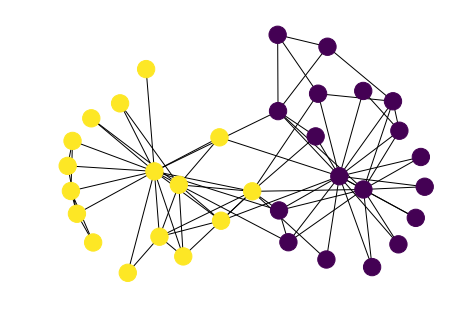

In [18]:
cl = AgglomerativeClustering(2, affinity='precomputed', linkage='average')
print('With linkage "{}" and {} clusters:'.format('average', 2))
nx.draw(G_karate, node_color=cl.fit_predict(distances))

With linkage "average" and 4 clusters:


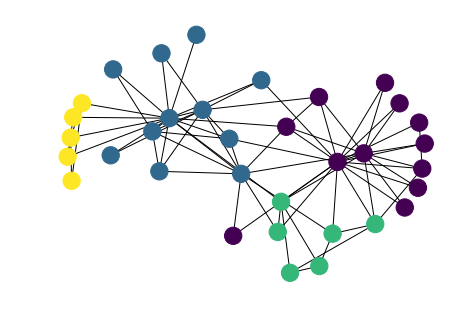

In [19]:
cl = AgglomerativeClustering(4, affinity='precomputed', linkage='average')
print('With linkage "{}" and {} clusters:'.format('average', 4))
nx.draw(G_karate, node_color=cl.fit_predict(distances))

#### Question 8

On va mettre en évidence visuellement les différences entre quelques mesures de centralité des noeuds

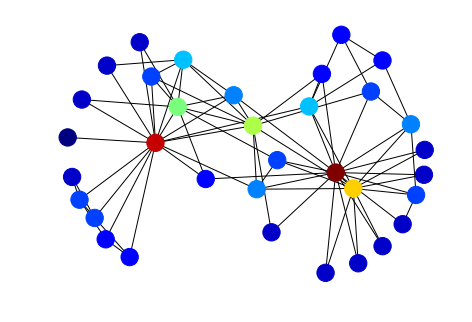

In [20]:
# conseil: utiliser l'option cmap = plt.get_cmap('jet') de nx.draw
# les couleurs iront du bleu foncé (peu central) au rouge foncé (très central)
colors = list(nx.degree_centrality(G_karate).values())
nx.draw(G_karate, cmap=plt.get_cmap('jet'), node_color=colors)

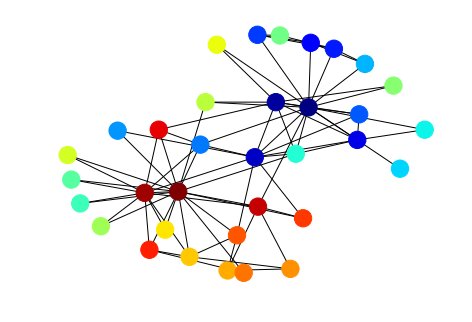

In [21]:
colors = list(nx.eigenvector_centrality(G_karate))
nx.draw(G_karate, cmap=plt.get_cmap('jet'), node_color=colors)

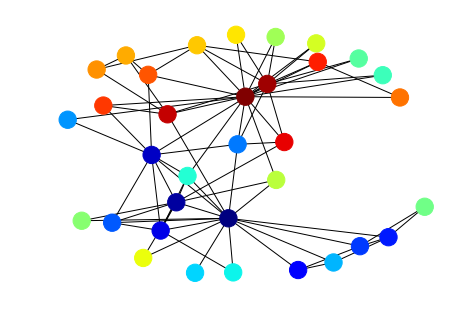

In [22]:
colors = list(nx.closeness_centrality(G_karate))
nx.draw(G_karate, cmap=plt.get_cmap('jet'), node_color=colors)

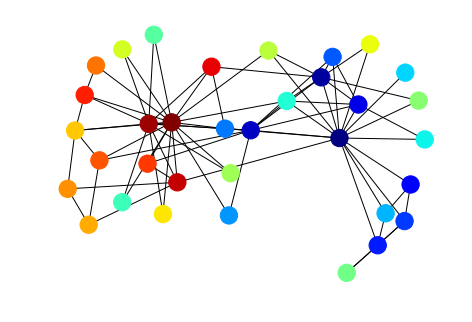

In [23]:
colors = list(nx.betweenness_centrality(G_karate))
nx.draw(G_karate, cmap=plt.get_cmap('jet'), node_color=colors)

### Graphe des produits Amazon

#### Question 9 (bonus +2 pts)

In [24]:
if os.path.exists('amazon.txt.gz') is False:
    resp = urlretrieve('https://snap.stanford.edu/data/bigdata/' +
                       'communities/com-amazon.ungraph.txt.gz', 
                       'amazon.txt.gz')

G_amazon = nx.read_edgelist('amazon.txt.gz')

In [25]:
nodes = G_amazon.nodes()
edges = G_amazon.edges()
degrees = list(G_amazon.degree().values())

print('Nombre de noeuds:', len(nodes))
print('Nombre d\'arêtes :', len(edges))
print('Degré minimum   :', np.min(degrees))
print('Degré maximum   :', np.max(degrees))
print('Degré médian    :', np.median(degrees))
print('Degré moyen     :', np.mean(degrees))

Nombre de noeuds: 334863
Nombre d'arêtes : 925872
Degré minimum   : 1
Degré maximum   : 549
Degré médian    : 4.0
Degré moyen     : 5.52985549314


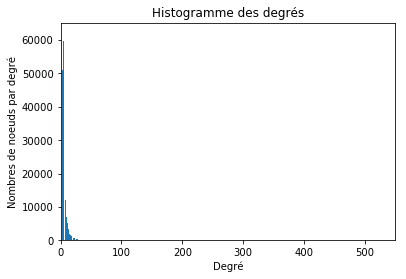

In [26]:
histo = nx.degree_histogram(G_amazon)
plt.xlabel('Degré')
plt.ylabel('Nombres de noeuds par degré')
plt.title('Histogramme des degrés')
n_bins = len(histo)
bins = list(range(n_bins))
plt.bar(bins, histo, width=0.8)
plt.xlim(0, n_bins)
pass

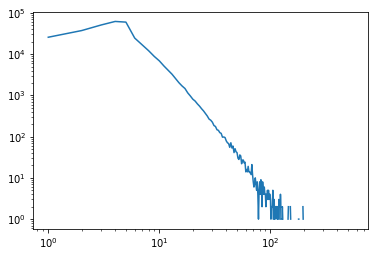

In [27]:
plt.loglog(bins, histo)
pass

In [28]:
avg_clustering = nx.average_clustering(G_amazon)
print('Coefficient de clustering:', avg_clustering)

Coefficient de clustering: 0.3967463932787456


In [ ]:
# VERY LONG RUNTIME !!!

flattened = []
for r in nx.all_pairs_shortest_path_length(G_amazon).values():
    flattened.extend(r.values())

mean_shortest_path_length = nx.average_shortest_path_length(G_amazon)
max_shortest_path_length = nx.diameter(G_amazon)

print('Average length of shortest paths:',
     mean_shortest_path_length)
print('Diameter of the graph (longest shortest path):',
     max_shortest_path_length)
plt.hist(flattened, bins=range(max_shortest_path_length+1))
pass

In [29]:
degrees_dict = G_amazon.degree()
v = defaultdict(list)

for key, value in sorted(degrees_dict.items()):
    v[value].append(key)

degrees_sorted = list(sorted(v.keys()))
avg_clusterings = [nx.average_clustering(G_amazon, v[d])
                  for d in degrees_sorted]

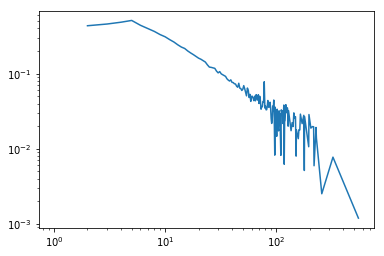

In [30]:
plt.loglog(degrees_sorted, avg_clusterings)
pass

On observe sur ce schéma à échelles logarithmiques que le coefficient de clustering moyen décroit linairement avec le degré.

## Prédiction dans les graphes

Nombre de noeuds: 150
Nombre d'arêtes: 1693
Nombre de composantes connexes: 2


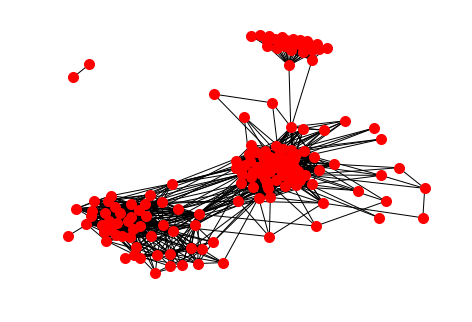

In [31]:
if os.path.exists('facebook.tar.gz') is False:
    resp = urlretrieve('https://snap.stanford.edu/data/facebook.tar.gz',
                              'facebook.tar.gz')
    tarfile.open("facebook.tar.gz", 'r:gz').extractall('.')

G_fb = nx.read_edgelist("facebook/414.edges")
n = G_fb.number_of_nodes()
m = G_fb.number_of_edges()
# on renumérote les noeuds de 0 à n-1
mapping=dict(zip(G_fb.nodes(), range(n)))
nx.relabel_nodes(G_fb, mapping, copy=False)
pos = nx.spring_layout(G_fb)
nx.draw(G_fb, node_size=100, pos=pos)
print("Nombre de noeuds: %d" % n)
print("Nombre d'arêtes: %d" % m)
print("Nombre de composantes connexes: %d" % nx.number_connected_components(G_fb))

#### Question 10

In [32]:
# G_fb_train est une copie du graphe original
# auquel on a retiré 20% des arêtes choisies aléatoirement

proportion_edges = 0.2
edge_subset = random.sample(G_fb.edges(),
                            int(proportion_edges * G_fb.number_of_edges()))
G_fb_train = G_fb.copy()
G_fb_train.remove_edges_from(edge_subset)

edge_subset_size = len(list(edge_subset))
print("Nombre d'arêtes retirées: %d" % edge_subset_size)
print("Nombre d'arêtes restantes: %d" % (m - edge_subset_size))
print("Nombre total d'arêtes non-existantes: %d" %
      len(list(nx.non_edges(G_fb_train))))

Nombre d'arêtes retirées: 338
Nombre d'arêtes restantes: 1355
Nombre total d'arêtes non-existantes: 9820


On veut scorer les arêtes non-existantes de façon à ce que les arêtes réelles retirées aient un plus grand score. On utilise plusieurs mesures de similarité entre paires de noeud et on calcule l'Aire sous la Courbe ROC (AUC). On trace également les courbes ROC pour chaque similarité.

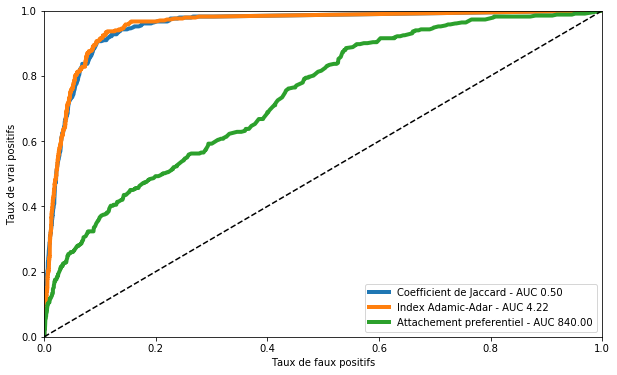

In [33]:
# exemple qui génère les scores et les labels (vrai arête ou fausse arête) avec jaccard
pred_jaccard = list(nx.jaccard_coefficient(G_fb_train))
score_jaccard, label_jaccard = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in pred_jaccard])

non_edges = list(nx.non_edges(G_fb_train))

jac_coef_non_exist = list(nx.jaccard_coefficient(G_fb_train, non_edges))
ada_coef_non_exist = list(nx.adamic_adar_index(G_fb_train, non_edges))
pref_coef_non_exist = list(nx.preferential_attachment(G_fb_train, non_edges))

y_true = []
y_pred_jac, y_pred_ada, y_pred_pref = [], [], []

for i in range(len(non_edges)):
    u, v, c_j = jac_coef_non_exist[i]
    _, _, c_a = ada_coef_non_exist[i]
    _, _, c_p = pref_coef_non_exist[i]
    
    y_true.append(1 if (u,v) in edge_subset else 0)
    y_pred_jac.append(c_j)
    y_pred_ada.append(c_a)
    y_pred_pref.append(c_p)

fpr_jaccard, tpr_jaccard, _ = metrics.roc_curve(y_true, y_pred_jac)
auc_jaccard = metrics.auc(y_true, y_pred_jac, reorder=True)
fpr_adamic, tpr_adamic, _ = metrics.roc_curve(y_true, y_pred_ada)
auc_adamic = metrics.auc(y_true, y_pred_ada, reorder=True)
fpr_pref, tpr_pref, _ = metrics.roc_curve(y_true, y_pred_pref)
auc_pref = metrics.auc(y_true, y_pred_pref, reorder=True)

# afficher ROC curve et AUC
plt.figure(figsize=(10, 6))
plt.plot(fpr_jaccard, tpr_jaccard, linewidth=4
         label='Coefficient de Jaccard - AUC %.2f' % auc_jaccard)
plt.plot(fpr_adamic, tpr_adamic, linewidth=4,
         label='Index Adamic-Adar - AUC %.2f' % auc_adamic)
plt.plot(fpr_pref, tpr_pref, linewidth=4, 
         label='Attachement preferentiel - AUC %.2f' % auc_pref)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrai positifs')
plt.legend(loc='lower right')
plt.show()

La prédiction donne des performances comparables en utilisant le coefficient de Jaccard ou l'index Adamic-Adar. L'attachement préférentiel quant à lui est bien moins performant.

#### Question 11

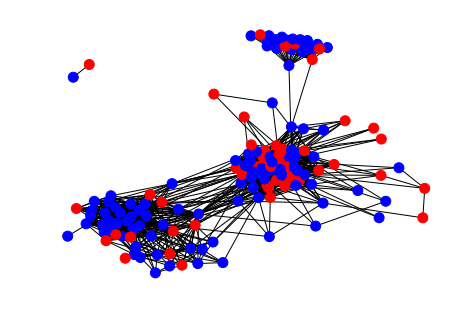

In [34]:
# on charge les labels des noeuds et on les affiche

with open('facebook/414.featnames') as f:
    for i, l in enumerate(f):
        pass

n_feat = i+1

features = np.zeros((n, n_feat))
f = open('facebook/414.feat', 'r')
for line in f:
    if line.split()[0] in mapping:
        node_id = mapping[line.split()[0]]
        features[node_id, :] = np.array(list(map(int, line.split()[1:])))

features = 2*features-1
feat_id = 43
labels = features[:, feat_id]

nx.draw(G_fb, cmap=plt.get_cmap('bwr'), node_color=labels, node_size=100, pos=pos)
plt.show()

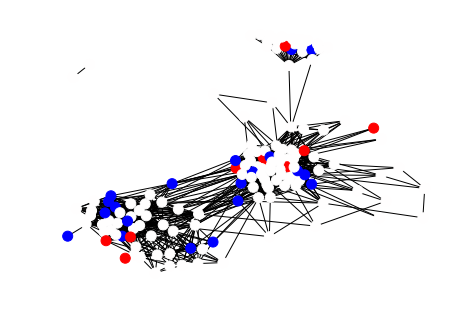

In [35]:
# on sélectionne 20% des noeuds pour lesquels on a accès à l'étiquette

random.seed(5)
proportion_nodes = 0.2
labeled_nodes = random.sample(G_fb.nodes(), int(proportion_nodes * G_fb.number_of_nodes()))

known_labels = np.zeros(n)
known_labels[labeled_nodes] = labels[labeled_nodes]

nx.draw(G_fb, cmap = plt.get_cmap('bwr'), node_color = known_labels, node_size=100, pos=pos)

On va maintenant appliquer la propagation de label et voir les résultats

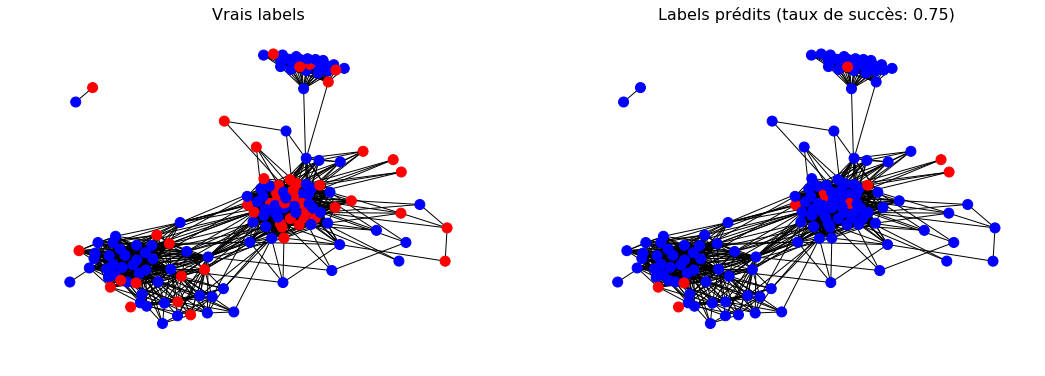

In [36]:
alpha = 0.7
L_sym = nx.normalized_laplacian_matrix(G_fb)

# on calcule la matrice de labels initiale
Y = np.zeros((n,2))
Y[known_labels==-1, 0] = 1
Y[known_labels==1, 1] = 1

# labels prédits à mettre dans F_pred pour affichage ci-dessous
n = L_sym.shape[0]
tmp = np.linalg.inv((1-alpha)*np.eye(n) + L_sym)
F_pred = np.argmax(np.dot(np.array(tmp), Y), axis=1)
labels_bin = labels.copy()
labels_bin[labels==-1] = 0
pred = np.mean(F_pred==labels_bin)

plt.figure(figsize=(18, 6))
f, axarr = plt.subplots(1, 2, num=1)

plt.sca(axarr[0])
nx.draw(G_fb, cmap=plt.get_cmap('bwr'), node_color=labels, node_size=100, pos=pos)
axarr[0].set_title('Vrais labels', size=16)

plt.sca(axarr[1])
nx.draw(G_fb, cmap=plt.get_cmap('bwr'), node_color=F_pred, node_size=100, pos=pos)
axarr[1].set_title('Labels prédits (taux de succès: %.2f)' % pred, size=16)
pass